# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

#Introducción

##Descripción del problema

##Objetivo del modelo

#Carga y preprocesamiento de datos

# Descarga de la data

La preparación de los datos y la definición de las arquitecturas de las redes neuronales constituyeron etapas fundamentales en este proyecto de clasificación de imágenes de los Simpsons. La metodología aplicada se fundamenta en las características de las redes convolucionales y en las mejores prácticas del aprendizaje profundo.

En primer lugar, se procedió a la descarga de los datos, se utilizan comandos `!wget` para descargar dos archivos: `simpsons_train.tar.gz` y `simpsons_test.tar.gz`. Estos archivos se obtienen de enlaces específicos y se guardan con los nombres especificados (-O). Posteriormente, se emplea el comando `!tar -xzvf` para descomprimir ambos archivos. La extensión `.tar.gz` indica que son archivos comprimidos (`gzip`) y empaquetados (`tarball`). La descompresión es un paso necesario para acceder a las imágenes contenidas en su interior y prepararlas para la carga en memoria y el procesamiento.

In [ ]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-17 02:46:26--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc104e4d1730b3cf7e930e917461.dl.dropboxusercontent.com/cd/0/inline/Cp2c6H90eaMmzm6opqzGYx6Bqhpu-EK9OnNrlRT_bT0Yoda1R1rCvMDbuxw-aoLx01wDm9kWp-2keEOq1sARoXsJT9igX53W5lJYV8wfjHQbi_a0drTZDEUVQIL6gkvERP8Q6tZZkghKADtt8pp4TrvD/file# [following]
--2025-05-17 02:46:26--  https://uc104e4d1730b3cf7e930e917461.dl.dropboxusercontent.com/cd/0/inline/Cp2c6H90eaMmzm6opqzGYx6Bqhpu-EK9OnNrlRT_bT0Yoda1R1rCvMDbuxw-aoLx01wDm9kWp-2keEOq1sARoXsJT9igX53W5lJYV8wfjHQbi_a0drTZDEUVQIL6gkvERP8Q6tZZkghKADtt8pp4TrvD/file
Resolving uc104e4d1730b3cf7e930e917461.dl.dropboxusercontent.com (uc104e4d1730b3cf7e930e917461.dl.dropboxusercontent.com)... 162.125.

In [ ]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-17 02:47:00--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfa3c2ac1d2eee7be5070d86ff6.dl.dropboxusercontent.com/cd/0/inline/Cp1oqh59FCPnxiZeD5eu_6wgoMl8Rw-zrkSf2_JMB13wVkBZHN_nRXafaCk3G1gYKp5he73Ly0R463d5-rK-SuJ2mDyt7Cy1cgLHaJouN2DwX7p2AJUzjGWDaZ26KsB6y0Gte5dZk63l9fLY0yYS2K1y/file# [following]
--2025-05-17 02:47:01--  https://ucfa3c2ac1d2eee7be5070d86ff6.dl.dropboxusercontent.com/cd/0/inline/Cp1oqh59FCPnxiZeD5eu_6wgoMl8Rw-zrkSf2_JMB13wVkBZHN_nRXafaCk3G1gYKp5he73Ly0R463d5-rK-SuJ2mDyt7Cy1cgLHaJouN2DwX7p2AJUzjGWDaZ26KsB6y0Gte5dZk63l9fLY0yYS2K1y/file
Resolving ucfa3c2ac1d2eee7be5070d86ff6.dl.dropboxusercontent.com (ucfa3c2ac1d2eee7be5070d86ff6.dl.dropboxusercontent.com)... 162.125.8

In [ ]:
!tar -xzvf simpsons_train.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/

In [ ]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

In [ ]:
import collections
import glob
import itertools
import os
import pprint

import cv2
from google.colab.patches import cv2_imshow

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Input, Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
    RandomContrast,
    RandomFlip,
    RandomRotation,
    RandomTranslation,
    RandomZoom
)
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import backend as keras_backend

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

 Se definen las funciones clave para la ingesta de los datos. La función `load_train_set` itera a través de los directorios de personajes en el conjunto de entrenamiento y carga cada imagen `.jpg`. Un aspecto crucial es el uso de `cv2.resize` para estandarizar el tamaño de todas las imágenes al definido por `IMG_SIZE` (`64x64 píxeles`), resolviendo el problema de tamaños de imagen variables en el dataset original. Las imágenes redimensionadas se almacenan en `X_train` y sus correspondientes etiquetas numéricas en `y_train`. La función `load_test_set` realiza una operación similar para el conjunto de prueba, extrayendo el nombre del personaje del nombre del archivo para asignar la etiqueta correcta antes de redimensionar y almacenar las imágenes y etiquetas en `X_test` y `y_test`.

In [ ]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

Posterior a ello, se definen dos constantes importantes para el proyecto. `MAP_CHARACTERS` es un diccionario que establece un mapeo entre los índices numéricos de las clases (`0` a `17`) y los nombres de los 18 personajes de los Simpsons que se utilizarán para la clasificación. Este mapeo es esencial para interpretar las predicciones numéricas del modelo en términos de los personajes reales. `IMG_SIZE` define la dimensión a la cual todas las imágenes serán redimensionadas (`64x64 píxeles`). Esta estandarización del tamaño es un requisito fundamental para la entrada a las redes neuronales convolucionales que se construirán posteriormente.

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

 Luego, se definen las rutas a los directorios donde se encuentran las imágenes descomprimidas para entrenamiento (`DATASET_TRAIN_PATH_COLAB`) y prueba (`DATASET_TEST_PATH_COLAB`). Posteriormente, se invocan las funciones `load_train_set` y `load_test_set` previamente definidas, pasando estas rutas y el diccionario `MAP_CHARACTERS`. Como resultado de la ejecución de estas funciones, las imágenes (ya redimensionadas a `IMG_SIZE`) y sus etiquetas correspondientes se cargan en memoria y se almacenan en los arrays de `NumPy` `X` y `y` para el conjunto de entrenamiento, y `X_test` y `y_test` para el conjunto de prueba. Este paso consolida los datos preprocesados (`redimensionados`) en estructuras listas para ser divididas y utilizadas en el entrenamiento y evaluación de los modelos.

In [ ]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


Posteriormente, se realiza el barajado aleatorio y la división de datos. En primer lugar, se realiza el barajado aleatorio del conjunto de entrenamiento original (`X`, `y`). Esto se consigue generando una permutación aleatoria de los índices utilizando `np.random.permutation` y aplicándola a ambos arrays. El propósito de este barajado es crucial para asegurar que, al dividir los datos posteriormente, la distribución de las clases (`personajes`) sea lo más uniforme posible en los conjuntos resultantes.

In [ ]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

Luego del barajado, se procede a la separación de los datos utilizando `train_test_split`. El conjunto de entrenamiento barajado (`X`, `y`) se divide en un `80%` para el entrenamiento efectivo (`X_train`, `y_train`) y un `20%` para la validación durante el entrenamiento (`X_val`, `y_val`), utilizando `test_size=0.2`. El conjunto de prueba (`X_test`, `y_test`) ya fue cargado por separado y no se modifica en esta división. Se imprime información detallada sobre el número de elementos y las dimensiones de cada conjunto para verificar que la división se realizó correctamente. Esta separación en tres conjuntos (entrenamiento, validación y prueba) es fundamental para un proceso de modelado y evaluación riguroso.


 Finalmente, se imprime esta información detallada sobre el tamaño y las dimensiones de cada conjunto para verificar que la división se realizó correctamente y que los datos están preparados con las formas esperadas para la entrada a los modelos. Esta separación en tres conjuntos (entrenamiento, validación y prueba) es fundamental para un proceso de modelado y evaluación riguroso, permitiendo monitorear el rendimiento durante el entrenamiento y obtener una evaluación final imparcial.

In [ ]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29, stratify=y)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


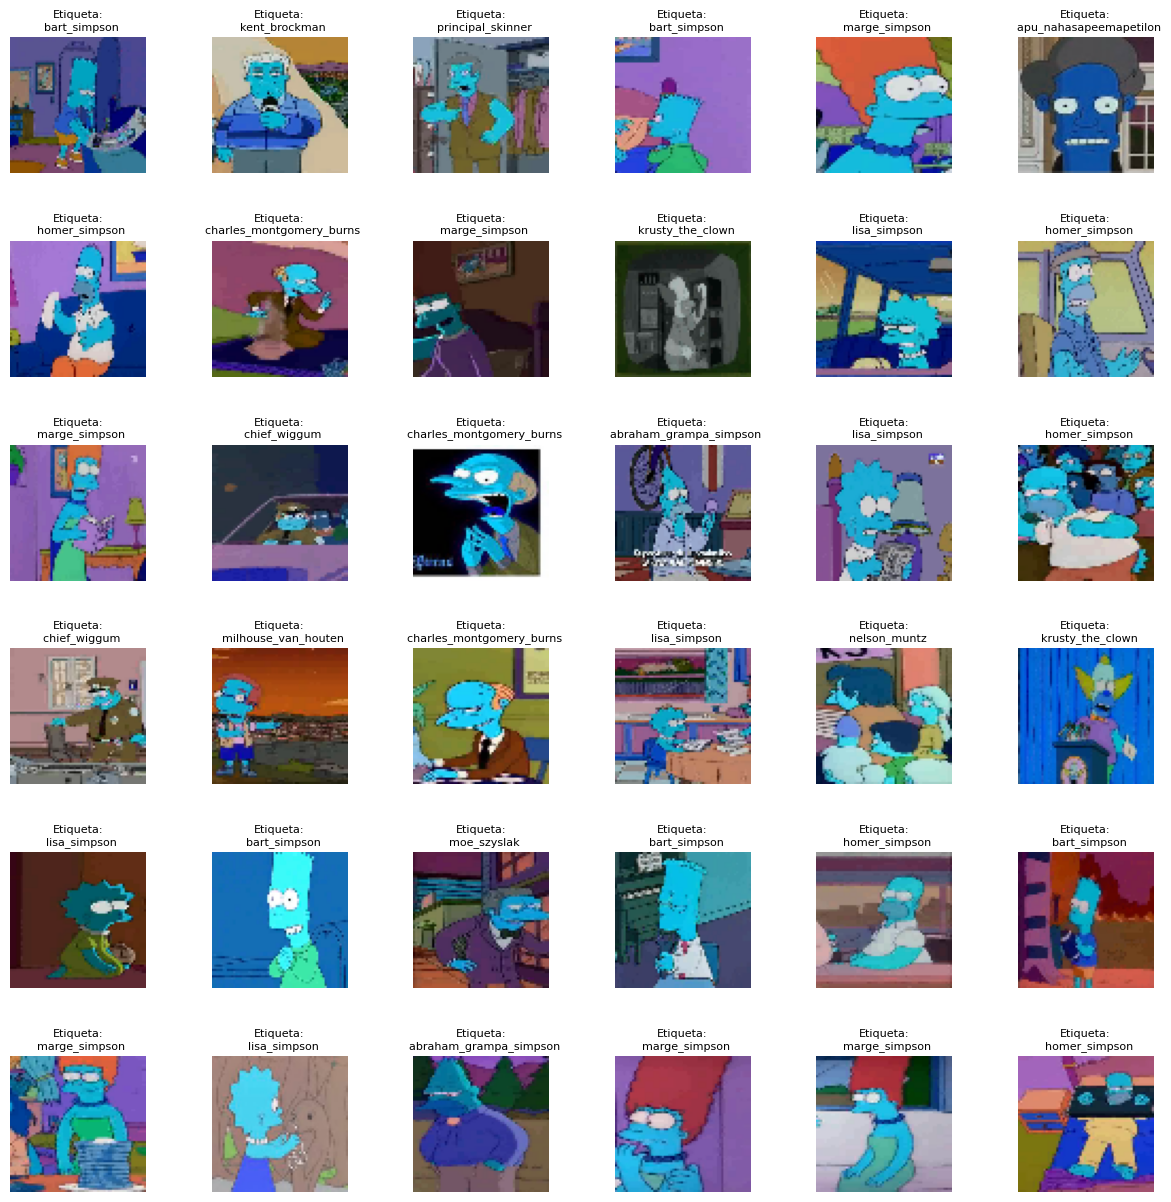

In [ ]:
def plot_random_training_images_grid(X_train, y_train, class_names=None, num_rows=6, num_cols=6, figsize=(10,10)):
    """
    Muestra una grilla de imágenes aleatorias del conjunto de entrenamiento con sus etiquetas verdaderas.

    Parámetros:
    -----------
    X_train : array-like
        Array de imágenes de entrenamiento (forma: [n_muestras, altura, ancho, canales]).
    y_train : array-like
        Etiquetas verdaderas para las imágenes de entrenamiento, como enteros o one-hot.
    class_names : list of str o None
        Nombres de las clases indexadas por la etiqueta. Si es None, se usan las etiquetas numéricas.
    num_rows : int
        Número de filas en la grilla.
    num_cols : int
        Número de columnas en la grilla.
    figsize : tuple
        Tamaño de la figura para el plot.
    """
    plt.figure(figsize=figsize)
    total = num_rows * num_cols
    for i in range(total):
        ax = plt.subplot(num_rows, num_cols, i+1)
        # Seleccionar un índice aleatorio
        ex = np.random.randint(len(X_train))

        # Obtener la imagen y la etiqueta verdadera
        img = X_train[ex]
        true_label_idx = np.argmax(y_train[ex]) if y_train.ndim > 1 and y_train.shape[1] > 1 else y_train[ex]

        # Construir el título con la etiqueta verdadera
        true_label = class_names[true_label_idx] if class_names else str(true_label_idx)
        title = f"Etiqueta:\n  {true_label}"

        # Mostrar la imagen
        # Handle grayscale images
        if img.ndim == 3 and img.shape[2] == 1:
            ax.imshow(img.squeeze(-1), cmap='gray')
        else:
            ax.imshow(img)

        ax.set_title(title, fontsize=8)
        ax.axis('off')
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()

# Ejecutar la función para mostrar la grilla
# Usamos X_train, y_train y MAP_CHARACTERS que ya están definidos
plot_random_training_images_grid(X_train, y_train, MAP_CHARACTERS, figsize=(15,15))

Para obtener una comprensión visual de la naturaleza del conjunto de datos de entrenamiento tal como se cargó y dividió, se emplea la función `plot_random_training_images_grid` para visualizar aleatoriamente una grilla de imágenes. Cada imagen mostrada proviene del conjunto de entrenamiento y está acompañada por su etiqueta verdadera, identificando al personaje de los Simpsons correspondiente. Estas imágenes, ya redimensionadas a `64x64 píxeles`, representan los ejemplos con los que se iniciará el procesamiento. Observar esta muestra permite apreciar la variabilidad en las poses, vestimenta, expresiones y calidad de las imágenes dentro de cada clase antes de aplicar transformaciones adicionales.

In [ ]:
# Normalización
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# Normalización
y_train = tf.keras.utils.to_categorical(y_train, num_categ)
y_val = tf.keras.utils.to_categorical(y_val, num_categ)
y_test = tf.keras.utils.to_categorical(y_test, num_categ)

Tras la división de los datos y una inspección visual inicial, se procede a la normalización de los valores de píxeles y a la codificación de las etiquetas. Los valores de intensidad de los píxeles en los conjuntos de imágenes (`X_train`, `X_val`, `X_test`), que se encontraban en el rango de `0` a `255`, se convierten a tipo flotante y se dividen por `255.0`. Esto escala los valores al rango [`0`, `1`], una práctica estándar en el preprocesamiento de imágenes para redes neuronales que contribuye a una convergencia más rápida y estable del proceso de entrenamiento. Paralelamente, las etiquetas numéricas de los conjuntos de entrenamiento, validación y prueba (`y_train`, `y_val`, `y_test`) se transforman al formato `one-hot encoding` utilizando `tf.keras.utils.to_categorical`. En este formato, cada etiqueta se representa como un vector binario donde solo el índice correspondiente a la clase correcta tiene un valor de 1. Este formato es necesario para la correcta aplicación de la función de pérdida

# Definición de modelos

Antes de comenzar a definir los modelos se procede a definir distintas funciones las cuales serán de ayuda para el proceso de entrenamiento, evaluación y comparación de los mismos.

Primero se define la función `test_model`, la cual es responsable de evaluar el rendimiento final de un modelo entrenado en el conjunto de prueba (`X_test`, `y_test`). Calcula métricas importantes y genera un reporte de clasificación detallado utilizando `sklearn.metrics.classification_report`. Este reporte proporciona métricas como `precisión`, `recall` y `f1-scor`e tanto a nivel global (`promedios`) como por cada clase (`personaje`), lo cual es crucial para entender el desempeño del modelo y identificar clases particularmente difíciles o fáciles de clasificar.

In [ ]:
def test_model(model, X_test, y_test, model_name=None, class_names=None, digits=4):
    """
    Evalúa un modelo de Keras en X_test/y_test e imprime classification_report
    usando nombres de clase si se proporcionan (lista o dict).

    Parámetros:
    -----------
    model : tf.keras.Model
        Modelo a evaluar.
    X_test : array-like
        Datos de entrada de test.
    y_test : array-like
        Etiquetas verdaderas (one-hot o enteras).
    model_name : str, opcional
        Nombre para mostrar en el reporte. Si es None, usa model.name.
    class_names : list[str] o dict[int,str], opcional
        Lista o diccionario mapeando índice de clase a nombre.
    digits : int, opcional
        Número de dígitos en las métricas (por defecto 4).

    Devuelve:
    ---------
    None (imprime el reporte).
    """
    # Nombre para el reporte
    name = model_name or getattr(model, "name", "model")

    # True labels como enteros
    if y_test.ndim > 1 and y_test.shape[1] > 1:
        y_true = np.argmax(y_test, axis=1)
    else:
        y_true = y_test

    # Predicción y conversión a enteros
    y_pred_prob = model.predict(X_test)
    if y_pred_prob.ndim > 1 and y_pred_prob.shape[1] > 1:
        y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        y_pred = y_pred_prob

    # Construir target_names según class_names
    if class_names is None:
        # Sin nombres: usar índices como strings
        num_classes = max(y_true.max(), y_pred.max()) + 1
        target_names = [str(i) for i in range(num_classes)]
    elif isinstance(class_names, dict):
        # dict: extraer según clave ordenada
        target_names = [class_names[i] for i in sorted(class_names.keys())]
    else:
        # list o tuple
        target_names = list(class_names)

    # Mostrar reporte
    print(f"\n--- Reporte de clasificación para {name} ---")
    print(classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=digits
    ))
    # Generar el reporte de clasificación como un diccionario
    report = classification_report(
        y_true,
        y_pred,
        target_names=target_names,
        digits=digits,
        output_dict=True # Agregamos esto para obtener un diccionario
    )
    return report


Luego, se define la función central `train_and_test`, que gestiona el ciclo completo de entrenamiento y evaluación para cada modelo. Implementa la técnica de `Early Stopping` configurando un callback (`EarlyStopping`) que monitorea la precisión en el conjunto de validación (`val_accuracy`) y detiene el entrenamiento si no se observa una mejora significativa después de un número especificado de épocas (`patience`). Además, este callback restaura automáticamente los pesos del modelo que obtuvieron el mejor rendimiento de validación. Una vez finalizado el entrenamiento (ya sea por alcanzar el número máximo de épocas o por Early Stopping), la función guarda el modelo entrenado (con los mejores pesos), lo recarga (para confirmar el proceso de guardado/carga) y finalmente lo evalúa en el conjunto de prueba llamando a `test_model`. También extrae y devuelve las métricas de entrenamiento y validación correspondientes a la mejor época identificada por Early Stopping, proporcionando una visión precisa del rendimiento óptimo del modelo durante el entrenamiento.

In [ ]:
def train_and_test(model,
                      X_train, y_train,
                      X_val,   y_val,
                      X_test,  y_test,
                      batch_size=32,
                      epochs=50,
                      patience=50):
    """
    Entrena el modelo con EarlyStopping (restaurando los mejores pesos),
    luego lo guarda, recarga y lo evalúa con test_model.
    """
    # 1) EarlyStopping callback
    es_cb = EarlyStopping(
        monitor='val_accuracy',
        patience=patience,
        restore_best_weights=True,
        verbose=1
    )

    # 2) Entrena
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[es_cb]
    )

    # 3) Imprime dónde se cortó y cuál fue el mejor val_accuracy
    best_epoch   = np.argmax(history.history['val_accuracy']) + 1
    history.history['best_epoch'] = best_epoch
    best_val_acc = np.max(history.history['val_accuracy'])
    print(f"\n▶️  {model.name}: stopped at epoch {len(history.history['loss'])}, "
          f"best epoch {best_epoch} with val_accuracy={best_val_acc:.4f}")

    # 4) Guarda el modelo con los pesos ya restaurados
    filename = f"{model.name}_best.keras"
    model.save(filename)
    print(f"💾  Modelo guardado en: {filename}")

    # 5) (Opcional) Recarga para comprobar
    best_model = tf.keras.models.load_model(filename)
    print(f"📥  Modelo recargado desde disco.")

    # 6) Evalúa con tu función de reporte
    report = test_model(best_model, X_test, y_test, model_name=model.name, class_names=MAP_CHARACTERS)

    return best_model, history, report

In [ ]:
def plot_image_grid_with_predictions(model, X, y_true=None, class_names=None, num_rows=3, num_cols=3, figsize=(10,10)):
    """
    Plots a grid of images with model predictions and optionally true labels.

    Parameters:
    -----------
    model : tf.keras.Model
        Trained Keras model for prediction.
    X : array-like
        Array of images to display (shape: [n_samples, height, width, channels]).
    y_true : array-like or None
        True labels, either as integers or one-hot. If None, true labels are omitted.
    class_names : list of str or None
        Names of classes indexed by label. If None, numerical labels are used.
    num_rows : int
        Number of rows in the grid.
    num_cols : int
        Number of columns in the grid.
    figsize : tuple
        Figure size for the plot.
    """
    # Predict probabilities and labels
    y_pred_prob = model.predict(X)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Process true labels if provided
    if y_true is not None:
        if y_true.ndim > 1 and y_true.shape[1] > 1:
            y_true_labels = np.argmax(y_true, axis=1)
        else:
            y_true_labels = y_true
    else:
        y_true_labels = None

    plt.figure(figsize=figsize)
    total = num_rows * num_cols
    for i in range(total):
        ax = plt.subplot(num_rows, num_cols, i+1)
        img = X[i]
        # Handle grayscale images
        if img.ndim == 3 and img.shape[2] == 1:
            ax.imshow(img.squeeze(-1), cmap='gray')
        else:
            ax.imshow(img)
        # Build title string
        pred_label = class_names[y_pred[i]] if class_names else str(y_pred[i])
        title = f"Pred: {pred_label}"
        if y_true_labels is not None:
            true_label = class_names[y_true_labels[i]] if class_names else str(y_true_labels[i])
            title += f"\nTrue: {true_label}"
        ax.set_title(title, fontsize=8)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# class_names = ['Homer', 'Marge', 'Bart', ..., 'Maggie']  # Ajusta con tus 17 nombres
#plot_image_grid_with_predictions(modelo7, X_test, y_test, MAP_CHARACTERS, num_rows=3, num_cols=3)


También, se define la función `comparar_metricas_modelos`, la cual toma los historiales de entrenamiento de múltiples modelos y compara sus métricas de entrenamiento y validación (como pérdida y accuracy) correspondientes a la mejor época de validación para cada modelo. Presenta esta comparación en formato tabular, lo que facilita la evaluación rápida del rendimiento de diferentes arquitecturas en los conjuntos de entrenamiento y validación.

In [ ]:
def comparar_metricas_modelos(historiales, nombres_modelos, modelo1, modelo2):
    """
    Compara las métricas de dos modelos específicos en una tabla.

    Args:
        historiales: Una lista de historiales de entrenamiento para cada modelo.
        nombres_modelos: Una lista de nombres de modelos (para las etiquetas de las filas).
        modelo1: Nombre del primer modelo a comparar.
        modelo2: Nombre del segundo modelo a comparar.

    Returns:
        Un DataFrame de Pandas que contiene las métricas de los dos modelos especificados.
    """

    # Obtener los índices de los modelos en las listas
    indice_modelo1 = nombres_modelos.index(modelo1)
    indice_modelo2 = nombres_modelos.index(modelo2)

    # Extraer las métricas de los modelos seleccionados
    metricas = []
    for i in [indice_modelo1, indice_modelo2]:
        historial = historiales[i]
        nombre_modelo = nombres_modelos[i]
        epoca = historial.history['best_epoch']
        perdida = historial.history['loss'][-1]
        accuracy = historial.history['accuracy'][-1]
        val_perdida = historial.history['val_loss'][-1]
        val_accuracy = historial.history['val_accuracy'][-1]

        metricas.append([nombre_modelo, epoca, accuracy, perdida,  val_accuracy, val_perdida])

    # Crear el DataFrame de Pandas
    df_metricas = pd.DataFrame(metricas, columns=['Modelo', 'Epoca', 'Accuracy', 'Pérdida',  'Accuracy de Validación', 'Pérdida de Validación'])
    return df_metricas

Además, se define la función `comparar_reports`. Esta función está diseñada para comparar los reportes de clasificación del conjunto de prueba de dos modelos específicos. Extrae métricas globales clave (como `accuracy`, `precision`, `recall` y `F1-score`) de los reportes y las presenta en un DataFrame de Pandas, permitiendo una comparación concisa del rendimiento final de los modelos en datos no vistos.

In [ ]:
def comparar_reports(report1, report2, nombre1, nombre2):
    """
    Compara dos classification reports (output_dict=True) y devuelve
    un DataFrame con: Modelo, Accuracy, Precision (macro avg), Recall (macro avg), F1-Score (macro avg).

    Args:
        report1 (dict): salida de classification_report(..., output_dict=True) para el primer modelo.
        report2 (dict): lo mismo para el segundo modelo.
        nombre1 (str): nombre o etiqueta para el primer modelo.
        nombre2 (str): nombre o etiqueta para el segundo modelo.

    Returns:
        pd.DataFrame: tabla con las métricas promedio de ambos modelos.
    """
    data = []
    for report, name in zip((report1, report2), (nombre1, nombre2)):
        accuracy    = report.get('accuracy', None)
        macro_avg   = report.get('macro avg', {})
        precision   = macro_avg.get('precision', None)
        recall      = macro_avg.get('recall', None)
        f1_score    = macro_avg.get('f1-score', None)

        data.append({
            'Modelo':       name,
            'Accuracy (Test)':     accuracy,
            'Precision (Test)':    precision,
            'Recall (Test)':       recall,
            'F1-Score (Test)':     f1_score
        })

    return pd.DataFrame(data)

# Ejemplo de uso:
# df = comparar_reports(report_modeloA, report_modeloB, "Modelo A", "Modelo B")
# print(df)

Posteriormente,, se define la función `comparar_modelos`. Esta función genera gráficos comparativos de las curvas de entrenamiento y validación (generalmente pérdida y accuracy) para dos modelos. Visualizar estos historiales en un mismo gráfico ayuda a analizar el progreso del entrenamiento, comparar la velocidad de convergencia, identificar patrones de sobreajuste y observar el punto donde el Early Stopping detuvo el entrenamiento para cada modelo.

In [ ]:
def comparar_modelos(hist_base, hist_mod,
                     nombre_base='Modelo Base',
                     nombre_mod='Modelo Modificado'):
    # extraer series
    loss_b, val_loss_b = hist_base.history['loss'], hist_base.history['val_loss']
    acc_b,  val_acc_b  = hist_base.history['accuracy'], hist_base.history['val_accuracy']
    loss_m, val_loss_m = hist_mod.history['loss'], hist_mod.history['val_loss']
    acc_m,  val_acc_m  = hist_mod.history['accuracy'], hist_mod.history['val_accuracy']

    # crear ejes x separados
    x_b = np.arange(1, len(loss_b) + 1)
    x_m = np.arange(1, len(loss_m) + 1)

    # límite común en x: de 1 al máximo número de épocas
    max_epochs = max(len(loss_b), len(loss_m))

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    for ax in axs:
        ax.set_axisbelow(True)
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.set_xlim(1, max_epochs)

    # PÉRDIDA
    axs[0].plot(x_b, loss_b,      label=f'{nombre_base} (Train)', zorder=3)
    axs[0].plot(x_b, val_loss_b,  label=f'{nombre_base} (Val)',   zorder=3)
    axs[0].plot(x_m, loss_m,      label=f'{nombre_mod} (Train)',  zorder=3)
    axs[0].plot(x_m, val_loss_m,  label=f'{nombre_mod} (Val)',    zorder=3)
    y_max = max(loss_b + val_loss_b + loss_m + val_loss_m)
    axs[0].set_ylim(0, y_max * 1.05)
    axs[0].set_title(f'Comparación de Pérdida — {nombre_base} vs {nombre_mod}')
    axs[0].set_xlabel('Época'); axs[0].set_ylabel('Pérdida')
    axs[0].legend(loc='upper right')

    # RENDIMIENTO
    axs[1].plot(x_b, acc_b,      label=f'{nombre_base} (Train)', zorder=3)
    axs[1].plot(x_b, val_acc_b,  label=f'{nombre_base} (Val)',   zorder=3)
    axs[1].plot(x_m, acc_m,      label=f'{nombre_mod} (Train)',  zorder=3)
    axs[1].plot(x_m, val_acc_m,  label=f'{nombre_mod} (Val)',    zorder=3)
    y_max = max(acc_b + val_acc_b + acc_m + val_acc_m)
    axs[1].set_ylim(0, min(1.0, y_max * 1.05))
    axs[1].set_title(f'Comparación de Rendimiento — {nombre_base} vs {nombre_mod}')
    axs[1].set_xlabel('Época'); axs[1].set_ylabel('Rendimiento')
    axs[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()


Finalmente, se incluye la función `plot_train_val_accuracy_comparison`. Esta función genera un gráfico de barras diseñado para comparar visualmente la Accuracy de Entrenamiento y la Accuracy de Validación alcanzadas por diferentes modelos en su mejor época de validación. Este tipo de gráfico es muy útil para contrastar el rendimiento de los modelos y observar la brecha entre el rendimiento en los datos vistos (`entrenamiento`) y los datos no vistos durante la optimización (`validación`), lo cual da indicios sobre la capacidad de generalización y el grado de sobreajuste.

In [ ]:
def plot_train_val_accuracy_comparison(all_histories, modelos_a_graficar=None):
    """
    Genera un gráfico de barras comparando la Accuracy de Entrenamiento
    y Validación en la mejor época de validación para varios modelos.

    Args:
        all_histories: dict[str, History]
            Claves = nombres de modelo, valores = objetos History devueltos por model.fit().
        modelos_a_graficar: list[str] | None
            Lista de modelos a incluir. Si es None, usa todos los de all_histories.
    """
    # Decidir qué modelos graficar
    if modelos_a_graficar is None:
        modelos = sorted(all_histories.keys())
    else:
        modelos = [m for m in modelos_a_graficar if m in all_histories]

    if not modelos:
        print("No hay modelos válidos para graficar.")
        return

    names, train_accs, val_accs = [], [], []

    for name in modelos:
        history = all_histories[name].history
        # mejor época según val_accuracy
        best_epoch_idx = int(np.argmax(history['val_accuracy']))
        names.append(name)
        train_accs.append(history['accuracy'][best_epoch_idx])
        val_accs.append( history['val_accuracy'][best_epoch_idx])

    # Configurar posición de barras
    x = np.arange(len(names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(max(8, len(names)*1.2), 6))
    rects1 = ax.bar(x - width/2, train_accs, width, label='Train')
    rects2 = ax.bar(x + width/2, val_accs,   width, label='Val')

    # Etiquetas y título
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy en Mejor Época (Train VS Val)')
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=45, ha='right')
    ax.set_ylim(0, 1.05)             # escala desde 0
    ax.legend()

    # Etiquetar valores encima de las barras
    def autolabel(rects):
        for r in rects:
            h = r.get_height()
            ax.annotate(f'{h:.3f}',
                        xy=(r.get_x()+r.get_width()/2, h),
                        xytext=(0,3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.show()


#Definición del modelo CNN

Antes de proceder a definir y entrenar las distintas arquitecturas de modelos, se inicializa un diccionario vacío: `all_histories`. Este diccionario servirá como una estructura de almacenamiento centralizada para guardar de forma organizada el objeto historial resultante del entrenamiento de cada modelo. El objeto historial (`history`) devuelto por el método `model.fit` contiene el valor de todas las métricas monitoreadas (como pérdida, accuracy, precisión, recall) en cada época de entrenamiento y validación. La utilización de este diccionario facilitará la comparación posterior de las curvas de entrenamiento y validación entre los diferentes modelos experimentados.

In [ ]:
all_histories = {}

## Modelo 1

Para comenzar con esta experimentación, se definió la arquitectura del primer modelo, denominado modelo1. Este modelo está diseñado como una red neuronal convolucional (CNN) y consta de las siguientes capas, apiladas secuencialmente:

- La arquitectura principal se basa en una serie de bloques `convolucionales` y de `pooling`. Se incluyen tres capas convolucionales (`Conv2D`) con filtros de tamaño `3x3` y activación `ReLU`, comenzando con `32 filtros` y duplicando su número en cada capa sucesiva (`64` y `128 filtros`). Cada capa convolucional va seguida de una capa de `MaxPooling` con ventanas de `2x2 píxeles`, lo que ayuda a reducir la dimensionalidad espacial y extraer las características más relevantes.

- Después de los bloques convolucionales, se aplica una capa de `Dropout` con una tasa del `50%` para regularización, desactivando aleatoriamente neuronas durante el entrenamiento para prevenir el sobreajuste. La salida de las capas convolucionales y de pooling se aplana utilizando una capa `Flatten` para convertirla en un vector unidimensional. Finalmente, se incluyen dos capas densas (`Dense`) con activación `ReLU`, y una capa de salida final con `num_categ` unidades (`18`) y activación `softmax` para la clasificación multiclase, produciendo una distribución de probabilidades sobre los personajes.

In [ ]:
modelo1 = keras.Sequential(
    [
        keras.Input(shape=(img_rows, img_cols, img_channels), name="entrada"),
        layers.Conv2D(32, (3, 3), activation='relu', name="convolucion_1"),
        layers.MaxPooling2D((2, 2), name="pooling_1"),
        layers.Conv2D(64, (3, 3), activation='relu', name="convolucion_2"),
        layers.MaxPooling2D((2, 2), name="pooling_2"),
        layers.Conv2D(128, (3, 3), activation='relu', name="convolucion_3"),
        layers.MaxPooling2D((2, 2), name="pooling_3"),

        layers.Dropout(0.5, name="dropout"),
        layers.Flatten(name="flatten_2"),
        layers.Dense(256, activation='relu', name="densa_2"),
        layers.Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo1"
)

Una vez definida la arquitectura de la red neuronal, se procede a su compilación. Este paso es fundamental para configurar el proceso de entrenamiento. Se especifica el optimizador, la función de pérdida y las métricas que se monitorearán.

Para esta tarea de clasificación multiclase, se elige la función de pérdida `categorical_crossentropy`, que es la apropiada cuando las etiquetas están en formato `one-hot encoding` y se busca minimizar la diferencia entre la distribución de probabilidad predicha y la distribución verdadera de la clase. Como métricas para evaluar el rendimiento durante el entrenamiento y la validación, se seleccionan accuracy (`precisión globa`l), `Precision` y `Recall` (`precisión` y `recall` por clase, que serán útiles para un análisis más detallado).

La elección del optimizador es `Adam`. Este optimizador se seleccionó basándose en pruebas preliminares que demostraron que proporcionaba consistentemente mejores resultados en comparación con otros optimizadores probados para este problema específico de clasificación de imágenes de los Simpsons. Adam es particularmente efectivo en problemas con datos complejos y de alta dimensionalidad como las imágenes, lo que lo convierte en una opción robusta y ampliamente utilizada en el entrenamiento de redes neuronales profundas.

In [ ]:
modelo1.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Una vez que la arquitectura de modelo1 ha sido definida y compilada con el optimizador y la función de pérdida adecuados, se procede a su entrenamiento y evaluación utilizando la función `train_and_test`. El modelo se entrena utilizando el conjunto de entrenamiento (`X_train`, `y_train`) durante un máximo de 20 épocas (`epochs=20`), procesando los datos en lotes de 32 imágenes (`batch_size=32`).

In [ ]:
best_model_1, history_1, report_1 = train_and_test(
    modelo1, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=20
)

Epoch 1/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.2545 - loss: 2.3998 - val_accuracy: 0.6044 - val_loss: 1.3582
Epoch 2/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6322 - loss: 1.2134 - val_accuracy: 0.7168 - val_loss: 0.9776
Epoch 3/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7466 - loss: 0.8214 - val_accuracy: 0.7665 - val_loss: 0.8094
Epoch 4/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8117 - loss: 0.6170 - val_accuracy: 0.7939 - val_loss: 0.7005
Epoch 5/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8518 - loss: 0.4727 - val_accuracy: 0.8044 - val_loss: 0.6628
Epoch 6/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8868 - loss: 0.3662 - val_accuracy: 0.8342 - val_loss: 0.6137
Epoch 7/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9063 - loss: 0.2960 - val_accuracy: 0.8289 - val_loss: 0.6396
Epoch 8/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9277 - loss: 0.2218 - val_accuracy: 

In [ ]:
all_histories['modelo1'] = history_1

## Modelo 2

Como parte de la experimentación para encontrar la arquitectura más efectiva, se define el segundo modelo, `modelo2`. Esta arquitectura mantiene la misma estructura base convolucional que modelo1, conservando los tres bloques de capas `Conv2D` con `32`, `64` y `128` filtros (todos con `kernel 3x3` y activación `ReLU`) seguidas de capas MaxPooling (con `pool size 2x2`). También se mantiene la capa de Dropout (con tasa `0.5`) y la capa de `Flatten` después de la sección convolucional.

El principal cambio introducido en `modelo2` respecto a `modelo1` se encuentra en la sección de capas densas. En lugar de la única capa densa de `256 unidade`s de modelo1, modelo2 implementa una secuencia más profunda de capas densas, con `512`, `256`, `128` y `64` unidades respectivamente, todas utilizando activación `ReLU`. Este ajuste se realiza con el objetivo de proporcionar al modelo una mayor capacidad para aprender relaciones complejas y combinaciones no lineales de las características extraídas por las capas convolucionales

In [ ]:
modelo2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(img_rows, img_cols, img_channels), name="entrada"),
        layers.Conv2D(32, (3,3), activation='relu', name="convolucion_1"),
        layers.MaxPooling2D((2,2), name="pooling_1"),
        layers.Conv2D(64, (3,3), activation='relu', name="convolucion_2"),
        layers.MaxPooling2D((2,2), name="pooling_2"),
        layers.Conv2D(128, (3,3), activation='relu', name="convolucion_3"),
        layers.MaxPooling2D((2,2), name="pooling_3"),

        layers.Dropout(0.5, name="dropout"),
        layers.Flatten(name="flatten_2"),
        layers.Dense(512, activation='relu', name="densa_1"),
        layers.Dense(256, activation='relu', name="densa_2"),
        layers.Dense(128, activation='relu', name="densa_3"),
        layers.Dense(64, activation='relu', name="densa_4"),
        layers.Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo2"
)

Una vez definida la arquitectura de modelo2, se procede a su compilación. Se decide mantener los mismos parámetros de compilación que se utilizaron para el primer modelo; es decir, se utiliza el optimizador `Adam`, la función de pérdida `categorical_crossentropy`, y se monitorean las métricas de `accuracy`. Esto permite aislar el efecto de los cambios arquitectónicos en el rendimiento del modelo.

In [ ]:
modelo2.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Con el modelo 2 definido y compilado, se procede a su entrenamiento y evaluación utilizando la función `train_and_test`. Este proceso se realiza bajo las mismas condiciones que para el primer modelo, utilizando los conjuntos de entrenamiento, validación y prueba, con un `batch_size` de `32`, hasta `20 épocas` y aplicando `Early Stopping`.

In [ ]:
best_model_2, history_2, report_2 = train_and_test(
    modelo2, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=20
)

Epoch 1/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1922 - loss: 2.5531 - val_accuracy: 0.4722 - val_loss: 1.6832
Epoch 2/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5434 - loss: 1.4782 - val_accuracy: 0.6399 - val_loss: 1.1280
Epoch 3/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6883 - loss: 0.9918 - val_accuracy: 0.7420 - val_loss: 0.8511
Epoch 4/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7649 - loss: 0.7399 - val_accuracy: 0.7736 - val_loss: 0.7533
Epoch 5/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8225 - loss: 0.5518 - val_accuracy: 0.8049 - val_loss: 0.6768
Epoch 6/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8687 - loss: 0.4192 - val_accuracy: 0.8247 - val_loss: 0.6458
Epoch 7/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9025 - loss: 0.3163 - val_accuracy: 0.8315 - val_loss: 0.6528
Epoch 8/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9197 - loss: 0.2679 - val_accuracy: 

In [ ]:
historiales = [history_1, history_2]

In [ ]:
nombres_modelos = ['modelo1', 'modelo2']

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo1', 'modelo2')

# Mostrar el DataFrame
df_comparacion

,Modelo,Epoca,Accuracy,Pérdida,Accuracy de Validación,Pérdida de Validación
0,modelo1,20,0.972882,0.087580,0.865491,0.738268
1,modelo2,16,0.969262,0.104068,0.850750,0.644300


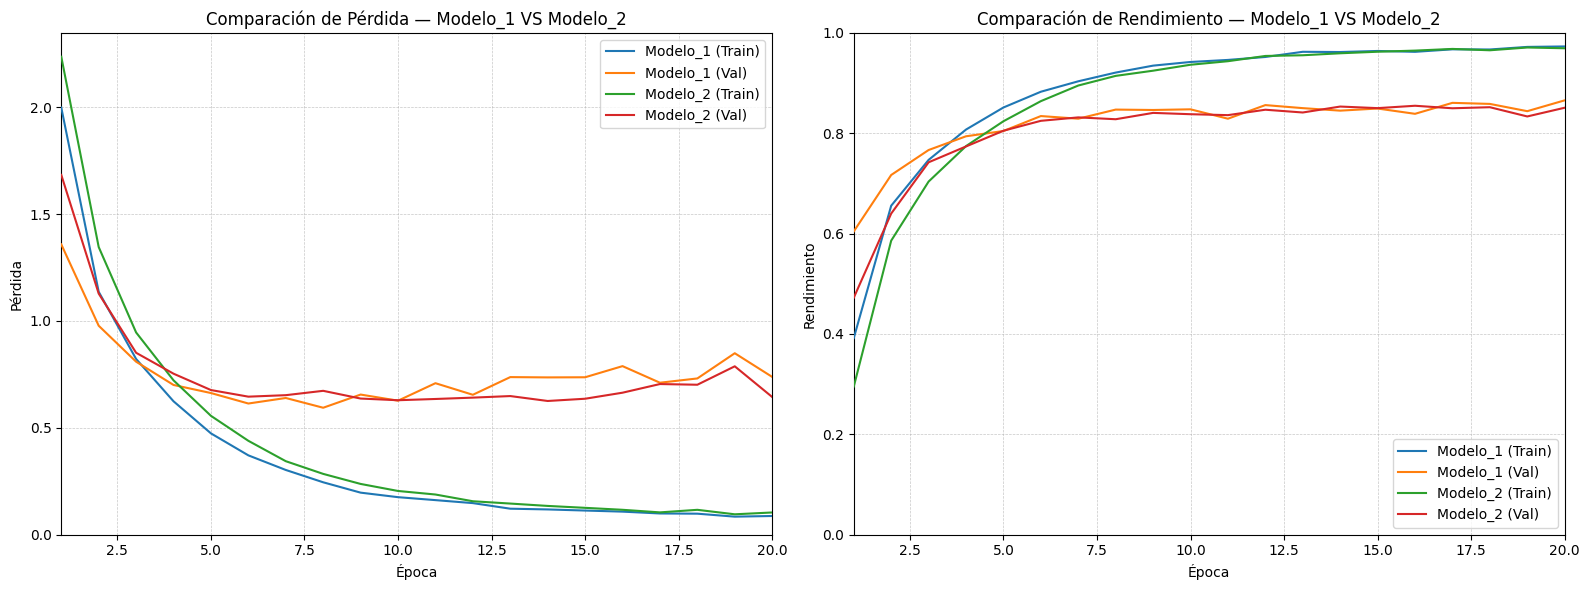

In [ ]:
comparar_modelos(history_1, history_2, 'Modelo_1', 'Modelo_2')

In [ ]:
df = comparar_reports(report_1, report_2, 'Modelo 1', 'Modelo 2')
df

,Modelo,Accuracy (Test),Precision (Test),Recall (Test),F1-Score (Test)
0,Modelo 1,0.960674,0.962054,0.960648,0.960743
1,Modelo 2,0.950562,0.953141,0.950603,0.950728


In [ ]:
all_histories['modelo2'] = history_2

## Modelo 3

Como tercer modelo en esta fase de experimentación arquitectónica, se decidió aumentar la complejidad de la sección convolucional en comparación con los modelos anteriores. La arquitectura del `modelo3` incorpora cinco capas convolucionales ocultas: una primera capa con `64 filtro`s y cuatro capas posteriores con `128 filtros` cada una. Todas utilizan filtros `3x3` y activación `relu`, y cada una va seguida por una capa `MaxPooling2D` con ventana de `2x2` para reducir la dimensionalidad. Un detalle relevante es que, de las cuatro capas de `128 filtros`, tres de ellas utilizan `padding="same"`, mientras que la primera capa de `64 filtros` y la primera de `128 filtros` no lo especifican, implicando un `padding 'valid'` por defecto.


Continuando con la estructura del modelo, después de esta sección convolucional expandida y la capa `Dropout` (con una tasa del `50%`), el `modelo3` mantiene la misma estructura para las capas densas que se utilizó en el `Modelo 1`. Es decir, presenta una única capa densa intermedia de `256 unidades` con activación `relu`, seguida por la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax` para la clasificación final. Este diseño busca evaluar si la mayor capacidad de extracción de características de una red convolucional más profunda, combinada con una etapa de clasificación densa más simple, resulta efectiva para el problema.

In [ ]:
modelo3 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(img_rows, img_cols, img_channels), name="entrada"),
        layers.Conv2D(64, (3,3), activation='relu', name="convolucion_1"),
        layers.MaxPooling2D((2,2), name="pooling_1"),
        layers.Conv2D(128, (3,3), activation='relu', name="convolucion_2"),
        layers.MaxPooling2D((2,2), name="pooling_2"),
        layers.Conv2D(128, (3,3), activation='relu', padding="same", name="convolucion_3"),
        layers.MaxPooling2D((2,2), name="pooling_3"),
        layers.Conv2D(128, (3,3), activation='relu', padding="same", name="convolucion_4"),
        layers.MaxPooling2D((2,2), name="pooling_4"),
        layers.Conv2D(128, (3,3), activation='relu', padding="same", name="convolucion_5"),
        layers.MaxPooling2D((2,2), name="pooling_5"),

        layers.Dropout(0.5, name="dropout"),
        layers.Flatten(name="flatten_2"),
        layers.Dense(256, activation='relu', name="densa_1"),
        layers.Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo3"
)


La compilación del tercer modelo se realiza con el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, monitoreando únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo3.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

 El entrenamiento se lleva a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`, empleando `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_3, history_3, report_3 = train_and_test(
    modelo3, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.1353 - loss: 2.7160 - val_accuracy: 0.4275 - val_loss: 1.7285
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.4838 - loss: 1.5877 - val_accuracy: 0.6736 - val_loss: 0.9953
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6915 - loss: 0.9486 - val_accuracy: 0.7842 - val_loss: 0.6800
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7768 - loss: 0.6885 - val_accuracy: 0.8268 - val_loss: 0.5852
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8345 - loss: 0.5236 - val_accuracy: 0.8555 - val_loss: 0.5089
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8745 - loss: 0.4042 - val_accuracy: 0.8713 - val_loss: 0.4709
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8945 - loss: 0.3401 - val_accuracy: 0.8794 - val_loss: 0.4585
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9054 - loss: 0.3060 - val_

In [ ]:
historiales = [history_2, history_3]

In [ ]:
nombres_modelos = ['modelo2', 'modelo3']

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion2 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo2', 'modelo3')

# Mostrar el DataFrame
df_comparacion2

,Modelo,Epoca,Accuracy,Pérdida,Accuracy de Validación,Pérdida de Validación
0,modelo2,16,0.969262,0.104068,0.850750,0.644300
1,modelo3,37,0.987560,0.046736,0.914978,0.519848


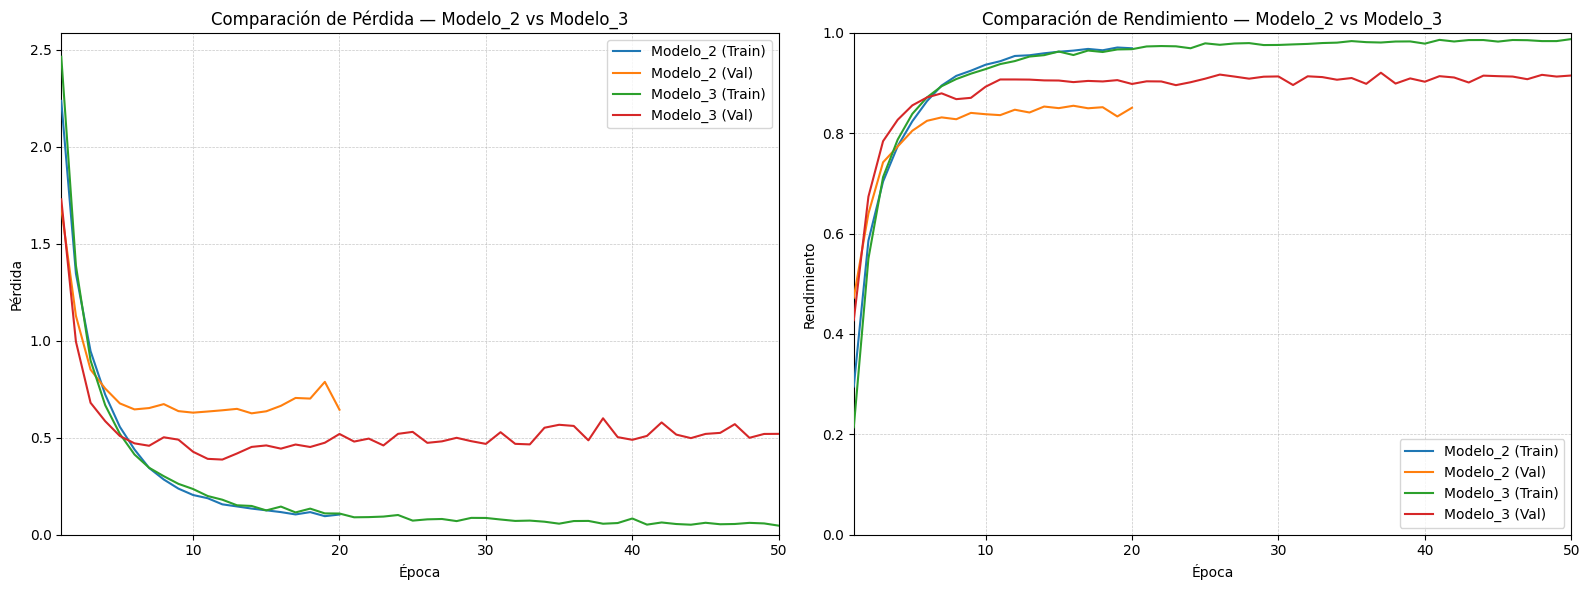

In [ ]:
comparar_modelos(history_2, history_3, 'Modelo_2', 'Modelo_3')

In [ ]:
df = comparar_reports(report_2, report_3, 'Modelo 2', 'Modelo 3')
df

,Modelo,Accuracy (Test),Precision (Test),Recall (Test),F1-Score (Test)
0,Modelo 2,0.950562,0.953141,0.950603,0.950728
1,Modelo 3,0.970787,0.971747,0.970671,0.970672


In [ ]:
all_histories['modelo3'] = history_3

## Modelo 4

Como cuarto modelo en esta serie de experimentos, en `modelo4` se explora una **arquitectura convolucional más profunda y robusta** al incorporar múltiples bloques de `Conv2D`, `BatchNormalization`, `Activation` y `MaxPooling2D`. Se basa en la estructura de mayor profundidad de la sección convolucional vista en el Modelo 3, pero añade la técnica de `Normalización por Lotes`. La arquitectura consta de cinco bloques `convolucionales/pooling`: el primero con `64 filtros` y los cuatro siguientes con `128 filtros`. Cada uno de estos bloques sigue el patrón de `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por una capa `BatchNormalization`, una capa de activación `relu`, y finalmente una capa `MaxPooling2D` con ventana de `2x2`. La inclusión de `padding="same"` en todas las capas convolucionales de estos bloques ayuda a preservar el tamaño espacial de las características antes del pooling.


Continuando con la estructura del modelo, después de esta sección convolucional profunda con `Batch Normalization`, se mantiene la capa `Dropout` con una tasa del `50%` para regularización, seguida por la capa `Flatten`. La sección de capas densas presenta una diferencia respecto a los Modelos 1 y 3; aunque conserva una capa `Dense` intermedia de `256 unidades`, añade una capa `BatchNormalization` y una capa de activación `relu` después de la capa `Dense` y antes de la capa de salida. La capa de salida final es una capa `Dense` con `num_categ` (`18`) unidades y activación `softmax` para la clasificación. La incorporación de `BatchNormalization` no solo en las capas convolucionales sino también en la capa densa intermedia es una característica clave de este modelo, buscando mejorar la estabilidad y el rendimiento general.

In [ ]:
modelo4 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(64, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),

        # Clasificador
        Dropout(0.5, name="dropout"),
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo4"
)


Para su compilación, `modelo4` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, y se configura para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo4.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_4, history_4, report_4 = train_and_test(
    modelo4, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.3603 - loss: 2.0920 - val_accuracy: 0.4201 - val_loss: 1.8789
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7270 - loss: 0.8868 - val_accuracy: 0.6489 - val_loss: 1.2121
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8197 - loss: 0.5995 - val_accuracy: 0.7073 - val_loss: 0.9785
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8612 - loss: 0.4496 - val_accuracy: 0.6757 - val_loss: 1.1366
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8975 - loss: 0.3371 - val_accuracy: 0.8600 - val_loss: 0.5133
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9153 - loss: 0.2820 - val_accuracy: 0.8526 - val_loss: 0.5069
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9287 - loss: 0.2297 - val_accuracy: 0.8344 - val_loss: 0.5762
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9408 - loss: 0.1913 - va

In [ ]:
historiales = [history_3, history_4]

In [ ]:
nombres_modelos = ['modelo3', 'modelo4']

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion3 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo3', 'modelo4')

# Mostrar el DataFrame
df_comparacion3

,Modelo,Epoca,Accuracy,Pérdida,Accuracy de Validación,Pérdida de Validación
0,modelo3,37,0.987560,0.046736,0.914978,0.519848
1,modelo4,49,0.995195,0.015043,0.921822,0.436373


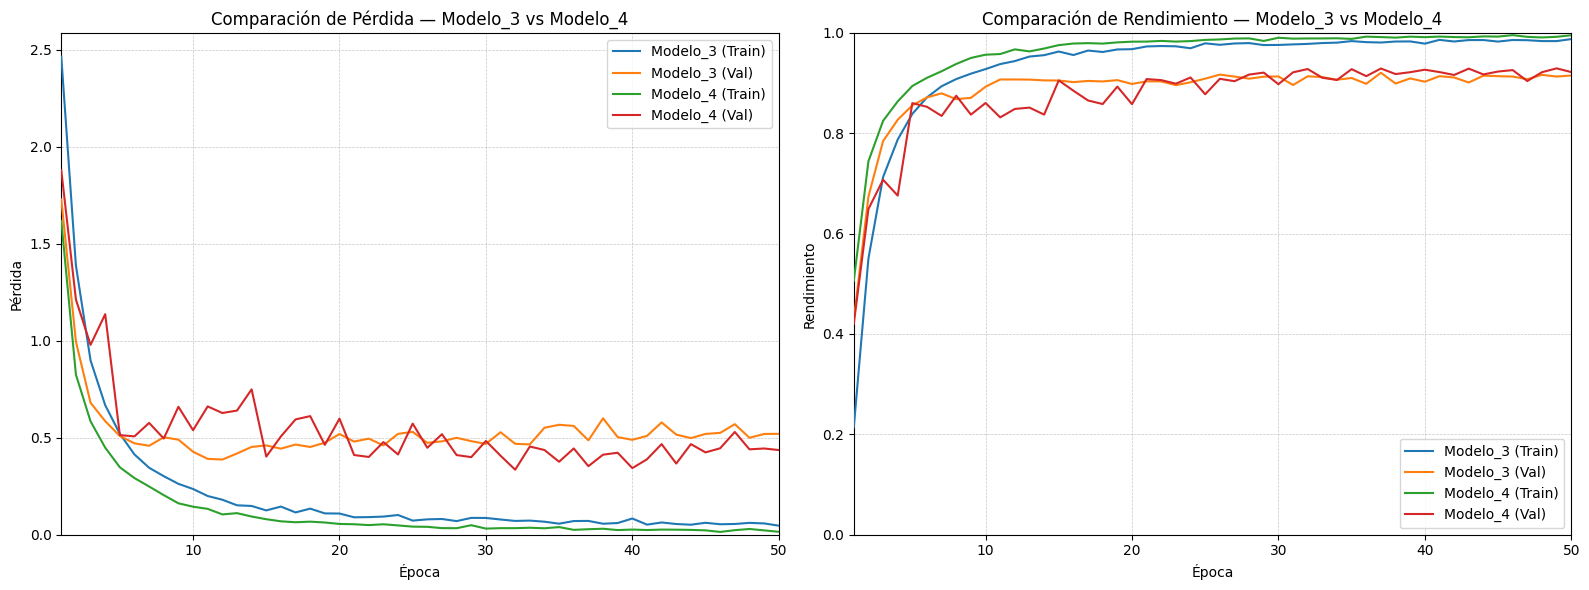

In [ ]:
comparar_modelos(history_3, history_4, 'Modelo_3', 'Modelo_4')

In [ ]:
df = comparar_reports(report_3, report_4, 'Modelo 3', 'Modelo 4')
df

,Modelo,Accuracy (Test),Precision (Test),Recall (Test),F1-Score (Test)
0,Modelo 3,0.970787,0.971747,0.970671,0.970672
1,Modelo 4,0.968539,0.970046,0.968493,0.968633


In [ ]:
all_histories['modelo4'] = history_4

## Modelo 5

Como quinto modelo en esta serie de experimentos, el `modelo5` parte de la arquitectura del `Modelo 4`, manteniendo la estructura profunda de los bloques convolucionales con `BatchNormalization`, pero introduciendo una regularización adicional mediante capas `Dropout` estratégicamente ubicadas dentro de la sección convolucional.

La arquitectura consiste en cinco bloques `convolucionales/pooling`: el primero con `64 filtros` y los cuatro siguientes con `128 filtros`. Cada bloque incluye `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por `BatchNormalization` y activación `relu`, y finalmente `MaxPooling2D` con ventana de `2x2`. La diferencia clave en este modelo es la adición de capas `Dropout` después del `MaxPooling2D` en los bloques 1, 2, 3 y 4. Se utiliza una tasa de `dropout` del `0.2` en el primer bloque y del `0.4` en los bloques 2, 3 y 4.

Continuando con la estructura del modelo, después del último bloque c`onvolucional/pooling` (Bloque 5, que no tiene dropout después del pooling), se mantiene la capa `Dropout` final con una tasa del `50%` (ubicada antes del `Flatten`), seguida por la capa `Flatten`. La sección de capas densas repite la estructura del `Modelo 4`: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, una capa de activación `relu`, y la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax`. La principal adición en el `modelo5` es la inserción de capas `Dropout` dentro de los primeros bloques convolucionales, buscando proporcionar una regularización adicional durante la extracción de características para prevenir el sobreajuste.

In [ ]:
modelo5 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(64, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.2, name="dropout_4"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.4, name="dropout_1"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.4, name="dropout_2"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.4, name="dropout_3"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),

        # Clasificador
        Dropout(0.5, name="dropout"),
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo5"
)


Para su compilación, `modelo5` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, y se configura para monitorear únicamente la métrica `accuracy` durante el entrenamiento, similar al Modelo 4.

In [ ]:
modelo5.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_5, history_5, report_5 = train_and_test(
    modelo5, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.1996 - loss: 2.6180 - val_accuracy: 0.2643 - val_loss: 2.2352
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4902 - loss: 1.6609 - val_accuracy: 0.6038 - val_loss: 1.2755
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6126 - loss: 1.2630 - val_accuracy: 0.5315 - val_loss: 1.5463
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6929 - loss: 1.0237 - val_accuracy: 0.7223 - val_loss: 0.9339
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7287 - loss: 0.8761 - val_accuracy: 0.6649 - val_loss: 1.0552
Epoch 6/50
227/475 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7598 - loss: 0.7571

In [ ]:
historiales = [history_4, history_5]

In [ ]:
nombres_modelos = ['modelo4', 'modelo5']

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion4 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo4', 'modelo5')

# Mostrar el DataFrame
df_comparacion4

In [ ]:
comparar_modelos(history_4, history_5, 'Modelo_4', 'Modelo_5')

In [ ]:
df = comparar_reports(report_4, report_5, 'Modelo 4', 'Modelo 5')
df

In [ ]:
all_histories['modelo5'] = history_5

## Modelo 6

Como sexto modelo en esta fase de experimentación, el `modelo6` parte de la arquitectura del `Modelo 5`, conservando la estructura profunda con `BatchNormalization`, pero ajustando las tasas de `Dropout` dentro de la sección convolucional.

La arquitectura inicial es idéntica a la del `Modelo 5`, consistiendo en cinco bloques `convolucionales/pooling` donde el primero tiene `64 filtros` y los cuatro siguientes tienen `128 filtros`. Cada bloque incluye `Conv2D` (`filtro 3x3`, `padding="same"`), `BatchNormalization`, activación `relu`, y `MaxPooling2D` (`ventana 2x2`). La diferencia principal de modelo6 respecto a modelo5 se encuentra en las tasas de `Dropout` aplicadas después del `MaxPooling2D` en los bloques 1, 2, 3 y 4. Mientras que el Bloque 1 mantiene una tasa de `0.2`, los Bloques 2 y 3 ahora utilizan una tasa de `0.3`, y el Bloque 4 utiliza una tasa de `0.4`.

Continuando con la estructura del modelo, después del último bloque `convolucional/pooling` (Bloque 5), se mantienen la capa `Dropout` final con una tasa del `50%`, seguida por la capa `Flatten`. La sección de capas densas repite la estructura de los modelos anteriores: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, activación `relu`, y la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax`. La modificación clave en el `modelo6` son los ajustes en las tasas de dropout dentro de los bloques convolucionales, buscando encontrar un equilibrio de regularización más efectivo para mejorar el rendimiento.

In [ ]:
modelo6 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(64, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.2, name="dropout_4"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.3, name="dropout_1"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.3, name="dropout_2"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.4, name="dropout_3"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),

        # Clasificador
        Dropout(0.5, name="dropout"),
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo6"
)


Para su compilación, el `modelo6` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, configurado para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo6.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_6, history_6, report_6 = train_and_test(
    modelo6, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

In [ ]:
historiales = [history_5, history_6]

In [ ]:
nombres_modelos = ['modelo5', 'modelo6']

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion5 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo5', 'modelo6')

# Mostrar el DataFrame
df_comparacion5

In [ ]:
comparar_modelos(history_5, history_6, 'Modelo_5', 'Modelo_6')

In [ ]:
df = comparar_reports(report_5, report_6, 'Modelo 5', 'Modelo 6')
df

In [ ]:
all_histories['modelo6'] = history_6

## Modelo 7

Como séptimo modelo en esta serie de experimentos, el `modelo7` explora una arquitectura con una capacidad de extracción de características significativamente mayor al incrementar el número de filtros en las capas convolucionales, manteniendo la estructura profunda y el uso de `BatchNormalization` observados en modelos anteriores.

La arquitectura sigue una estructura secuencial similar a la de los Modelos anteriores, consistiendo en cinco bloques `convolucionales/pooling`. Sin embargo, en el `modelo7`, todas las capas `Conv2D` dentro de estos bloques utilizan `256 filtros` (a diferencia de la progresión 64-128-128-128-128 de los modelos anteriores). Cada bloque sigue el patrón de `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por una capa `BatchNormalization`, una capa de activación `relu`, y finalmente una capa `MaxPooling2D` con ventana de `2x2`. Además, se mantiene la adición de capas `Dropout` después del `MaxPooling2D` en los bloques 1, 2, 3 y 4, y en este modelo se utiliza una tasa de `dropout` uniforme del `0.5` en estos cuatro bloques.

Continuando con la estructura del modelo, después del último bloque `convolucional/pooling` (Bloque 5, sin dropout después del pooling), se mantiene la capa `Dropout` final con una tasa del` 0.5` (ubicada antes del `Flatten`), seguida por la capa `Flatten`. La sección de capas densas repite la estructura del Modelo 4, 5 y 6: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, activación `relu`, y la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax`. La principal modificación en el `modelo7` es el aumento sustancial en el número de filtros convolucionales y la aplicación consistente de una tasa de `dropout` del `0.5` en la sección convolucional, buscando potenciar la capacidad del modelo para aprender representaciones complejas de las imágenes.

In [ ]:
modelo7 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(256, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.5, name="dropout_4"),

        # Bloque 2
        Conv2D(256, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.5, name="dropout_1"),

        # Bloque 3
        Conv2D(256, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.5, name="dropout_2"),

        # Bloque 4
        Conv2D(256, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.5, name="dropout_3"),

        # Bloque 5
        Conv2D(256, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),

        # Clasificador
        Dropout(0.5, name="dropout"),
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo7"
)


Para su compilación, el `modelo7` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, configurado para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo7.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_7, history_7, report_7 = train_and_test(
    modelo7, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

In [ ]:
historiales = [history_6, history_7]

In [ ]:
nombres_modelos = ['modelo6', 'modelo7']

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion6 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo6', 'modelo7')

# Mostrar el DataFrame
df_comparacion6

In [ ]:
comparar_modelos(history_6, history_7, 'Modelo_6', 'Modelo_7')

In [ ]:
df = comparar_reports(report_6, report_7, 'Modelo 6', 'Modelo 7')
df

In [ ]:
all_histories['modelo7'] = history_7

## Modelo 8

Como octavo modelo en esta fase de experimentación, el `modelo8` regresa a una configuración de filtros convolucionales más moderada en comparación con el `Modelo 7`, pero mantiene la estructura profunda, el uso de `BatchNormalization` y las capas `Dropout` dentro de la sección convolucional.

La arquitectura sigue una estructura secuencial similar a la de los modelos anteriores, consistiendo en cinco bloques `convolucionales/pooling`. Sin embargo, en el `modelo8`, todas las capas `Conv2D` dentro de estos bloques utilizan `128 filtros`. Cada bloque sigue el patrón de `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por una capa `BatchNormalization`, una capa de activación `relu`, y finalmente una capa `MaxPooling2D` con ventana de `2x2`. Se mantiene la adición de capas `Dropout` después del `MaxPooling2D` en los bloques 1, 2, 3 y 4, y en este modelo se utiliza una tasa de `dropout` uniforme del `0.4` en estos cuatro bloques.

Continuando con la estructura del modelo, después del último bloque `convolucional/pooling` (Bloque 5), se mantiene la capa `Dropout` final con una tasa del `0.5` (ubicada antes del `Flatten`), seguida por la capa `Flatten`. La sección de capas densas repite la estructura de los modelos anteriores: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, activación `relu`, y la capa de salida `Dense` con `num_categ` (`18`) unidades y activación `softmax`. La modificación principal en el `modelo8` es la reducción en el número de filtros convolucionales a `128` en todas las capas (a diferencia de los `256` del `Modelo 7`) y el uso de una tasa de `dropout` uniforme del `0.4` en los bloques convolucionales, buscando encontrar un equilibrio entre la capacidad del modelo y la regularización.

In [ ]:
modelo8 = Sequential(
    [
        # Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # Bloque 1
        Conv2D(128, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.4, name="dropout_4"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.4, name="dropout_1"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.4, name="dropout_2"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.4, name="dropout_3"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),

        # Clasificador
        Dropout(0.5, name="dropout"),
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo8"
)


Para su compilación, el `modelo8` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, configurado para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo8.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_8, history_8, report_8 = train_and_test(
    modelo8, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

In [ ]:
historiales = [history_7, history_8]

In [ ]:
nombres_modelos = ['modelo7', 'modelo8']

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion7 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo7', 'modelo8')

# Mostrar el DataFrame
df_comparacion7

In [ ]:
comparar_modelos(history_7, history_8, 'Modelo_7', 'Modelo_8')

In [ ]:
df = comparar_reports(report_7, report_8, 'Modelo 7', 'Modelo 8')
df

In [ ]:
all_histories['modelo8'] = history_8

## Modelo 9

Como noveno modelo en esta fase de experimentación arquitectónica, el `modelo9` busca combinar múltiples técnicas que han sido exploradas individualmente en modelos anteriores, enfocándose en aumentar la robustez y la capacidad de generalización del modelo.

La arquitectura comienza con la incorporación de capas de `Data Augmentation` justo después de la capa de entrada. Específicamente, incluye `RandomFlip("horizontal")`, `RandomRotation(0.1)`, `RandomZoom(0.1)`, y `RandomTranslation(0.1, 0.1)`. Estas capas aplican transformaciones aleatorias a las imágenes de entrenamiento en tiempo real, ayudando al modelo a ser más resistente a variaciones en la orientación, escala y posición de los objetos.

Después de las capas de `Data Augmentation`, la sección convolucional sigue una estructura profunda con cinco bloques `convolucionales/pooling`. El primer bloque utiliza `64 filtros`, y los cuatro bloques siguientes utilizan `128 filtros`. Cada bloque consta de `Conv2D` con `filtro 3x3` y `padding="same"`, seguido por `BatchNormalization`, activación `relu`, y `MaxPooling2D` con ventana de `2x2`. Las capas `Dropout` dentro de la sección convolucional se aplican después del `MaxPooling2D` en todos los cinco bloques, con tasas de `0.2` en el primer bloque, `0.3` en los bloques 2, 3 y 4, y `0.5` en el bloque 5.

Continuando con la estructura del modelo, después del último bloque `convolucional/pooling` con su respectivo dropout, se mantiene la capa `Flatten`. La sección de capas densas repite la estructura de los modelos anteriores: una capa `Dense` intermedia de `256 unidades`, seguida por una capa `BatchNormalization`, activación `relu`, y la capa de salida `Dens`e con `num_categ` (`18`) unidades y activación `softmax`. La principal característica de el `modelo9` es la combinación de `Data Augmentation` en la entrada con una arquitectura convolucional profunda que incluye `Batch Normalization` y `Dropout` en múltiples niveles, buscando potenciar la capacidad de generalización y el rendimiento al abordar simultáneamente la variabilidad de los datos y el riesgo de sobreajuste.

In [ ]:
modelo9 = Sequential(
    [
        # 1) Capa de entrada
        Input(shape=(img_rows, img_cols, img_channels), name="entrada"),

        # 2) Data Augmentation
        RandomFlip("horizontal", name="da_flip"),
        RandomRotation(0.1,        name="da_rotate"),      # ±10%
        RandomZoom(0.1,            name="da_zoom"),        # ±10%
        RandomTranslation(0.1, 0.1, name="da_translate"),   # ±10% ancho/alto
        #RandomContrast(0.1,        name="da_contrast"),    # ±10% contraste

                # Bloque 1
        Conv2D(64, (3,3), padding="same", name="conv_1"),
        BatchNormalization(name="bn_1"),
        Activation('relu', name="act_1"),
        MaxPooling2D((2,2), name="pool_1"),
        Dropout(0.2, name="dropout_1"),

        # Bloque 2
        Conv2D(128, (3,3), padding="same", name="conv_2"),
        BatchNormalization(name="bn_2"),
        Activation('relu', name="act_2"),
        MaxPooling2D((2,2), name="pool_2"),
        Dropout(0.3, name="dropout_2"),

        # Bloque 3
        Conv2D(128, (3,3), padding="same", name="conv_3"),
        BatchNormalization(name="bn_3"),
        Activation('relu', name="act_3"),
        MaxPooling2D((2,2), name="pool_3"),
        Dropout(0.3, name="dropout_3"),

        # Bloque 4
        Conv2D(128, (3,3), padding="same", name="conv_4"),
        BatchNormalization(name="bn_4"),
        Activation('relu', name="act_4"),
        MaxPooling2D((2,2), name="pool_4"),
        Dropout(0.3, name="dropout_4"),

        # Bloque 5
        Conv2D(128, (3,3), padding="same", name="conv_5"),
        BatchNormalization(name="bn_5"),
        Activation('relu', name="act_5"),
        MaxPooling2D((2,2), name="pool_5"),
        Dropout(0.5, name="dropout_5"),

        # Clasificador
        Flatten(name="flatten"),
        Dense(256, name="fc_1"),
        BatchNormalization(name="bn_fc"),
        Activation('relu', name="act_fc"),
        Dense(num_categ, activation='softmax', name="salida"),
    ],
    name="modelo9"
)


Para su compilación, el `modelo9` utiliza el optimizador `Adam` y la función de pérdida `categorical_crossentropy`, configurado para monitorear únicamente la métrica `accuracy` durante el entrenamiento.

In [ ]:
modelo9.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

El entrenamiento y evaluación se llevan a cabo utilizando la función `train_and_test` con un `batch_size` de `32` y hasta `50 epochs`. Se emplea `EarlyStopping` con una paciencia predeterminada de `50 épocas` para monitorear la `val_accuracy`, guardando el modelo con los mejores pesos obtenidos en validación para su posterior evaluación en el conjunto de prueba.

In [ ]:
best_model_9, history_9, report_9 = train_and_test(
    modelo9, X_train, y_train, X_val, y_val, X_test, y_test,
    batch_size=32, epochs=50
)

In [ ]:
historiales = [history_8, history_9]

In [ ]:
nombres_modelos = ['modelo8', 'modelo9']

In [ ]:
# Comparar las métricas de 'Baseline' y 'Cambio_1'
df_comparacion8 = comparar_metricas_modelos(historiales, nombres_modelos, 'modelo8', 'modelo9')

# Mostrar el DataFrame
df_comparacion8

In [ ]:
comparar_modelos(history_8, history_9, 'Modelo_8', 'Modelo_9')

In [ ]:
df = comparar_reports(report_8, report_9, 'Modelo 8', 'Modelo 9')
df

In [ ]:
all_histories['modelo9'] = history_9

In [ ]:
plot_train_val_accuracy_comparison(all_histories)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import pprint

# all_best_epoch_metrics: dict[name → dict(metricas en best epoch)]
# all_models:             dict[name → modelo Keras ya entrenado (con restore_best_weights=True)]
# X_test, y_test:         tus datos de test
# target_names:           lista de nombres de clases para el reporte

# 1) Encuentra el mejor modelo
mejor_modelo_nombre = None
mejor_val_accuracy  = -1

print("Buscando el mejor modelo basado en 'val_accuracy' en su mejor época de validación...")

if not all_best_epoch_metrics:
    print("❌ No hay métricas en all_best_epoch_metrics.")
else:
    for name, metrics in all_best_epoch_metrics.items():
        val_acc = metrics.get('val_accuracy', np.nan)
        if not np.isnan(val_acc) and val_acc > mejor_val_accuracy:
            mejor_val_accuracy  = val_acc
            mejor_modelo_nombre = name

    if mejor_modelo_nombre is None:
        print("❌ No se encontró ningún modelo válido.")
    else:
        # 2) Mostrar info del mejor
        best_epoch = all_best_epoch_metrics[mejor_modelo_nombre].get('epoch', 'N/A')
        print(f"\n🏆 Mejor modelo: {mejor_modelo_nombre}")
        print(f"    → val_accuracy = {mejor_val_accuracy:.4f}  (Época {best_epoch})\n")

        # 3) Métricas de entrenamiento/validación en esa época
        print("--- Métricas en la Mejor Época (Train vs Val) ---")
        df = comparar_metricas_mejor_epoca_validacion(
            all_best_epoch_metrics,
            [mejor_modelo_nombre]
        )
        display(df.round(4))

        # 4) Generar y mostrar Classification Report sobre test
        print(f"\n--- Classification Report en Test para {mejor_modelo_nombre} ---")
        modelo = all_models[mejor_modelo_nombre]

        # Predecir
        y_pred_prob = modelo.predict(X_test)
        # si es clasificación “one-hot”:
        if y_pred_prob.ndim > 1 and y_pred_prob.shape[1] > 1:
            y_pred = np.argmax(y_pred_prob, axis=1)
        else:
            # binaria
            y_pred = (y_pred_prob > 0.5).astype(int).ravel()

        # Reporte detallado (string formateado)
        report_str = classification_report(
            y_test,
            y_pred,
            target_names=target_names,
            digits=4
        )
        print(report_str)

        # Reporte en dict para extraer sólo macro/weighted avg
        report_dict = classification_report(
            y_test,
            y_pred,
            target_names=target_names,
            output_dict=True
        )
        print("Macro avg & Weighted avg:")
        pprint.pprint({
            'macro avg':    report_dict.get('macro avg'),
            'weighted avg': report_dict.get('weighted avg')
        }, indent=4)


#Conclusiones